In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

##Preprocces Dataset

In [2]:
# load Cifar-10 dataset 
(X_train, y_train), (X_test ,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print('Training data shape : ', X_train.shape)
print('Training labels shape : ', y_train.shape)
print('Test data shape : ', X_test.shape)
print('Test labels shape : ', y_test.shape)

Training data shape :  (50000, 32, 32, 3)
Training labels shape :  (50000, 1)
Test data shape :  (10000, 32, 32, 3)
Test labels shape :  (10000, 1)


###Distribution of train dataset

In [ ]:
y_train_df = pd.DataFrame(y_train,columns=["Labels"])
y_train_df

,Labels
0,6
1,9
2,9
3,4
4,1
...,...
49995,2
49996,6
49997,9
49998,1


In [ ]:
distribution_train = y_train_df["Labels"].value_counts()
distribution_train

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: Labels, dtype: int64

In [10]:
#  class names in dataset 
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

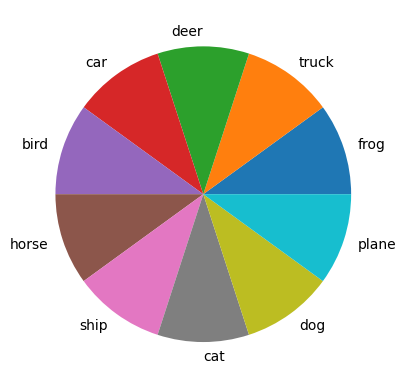

In [ ]:
# visualization of the distribution of the train dataset
plt.pie(distribution_train.values, labels = [class_names[i] for i in distribution_train.index])
plt.show() 

In the **Train dataset**, the frequency of classes is uniform across all the different categories. This means that each class has an equal representation in the dataset, and there is no significant bias towards any particular class. The distribution of classes does not show any major imbalance, and each class has an approximately equal number of instances in the dataset. Therefore, the train dataset is considered to have a balanced distribution of classes.

###Visualize train dataset

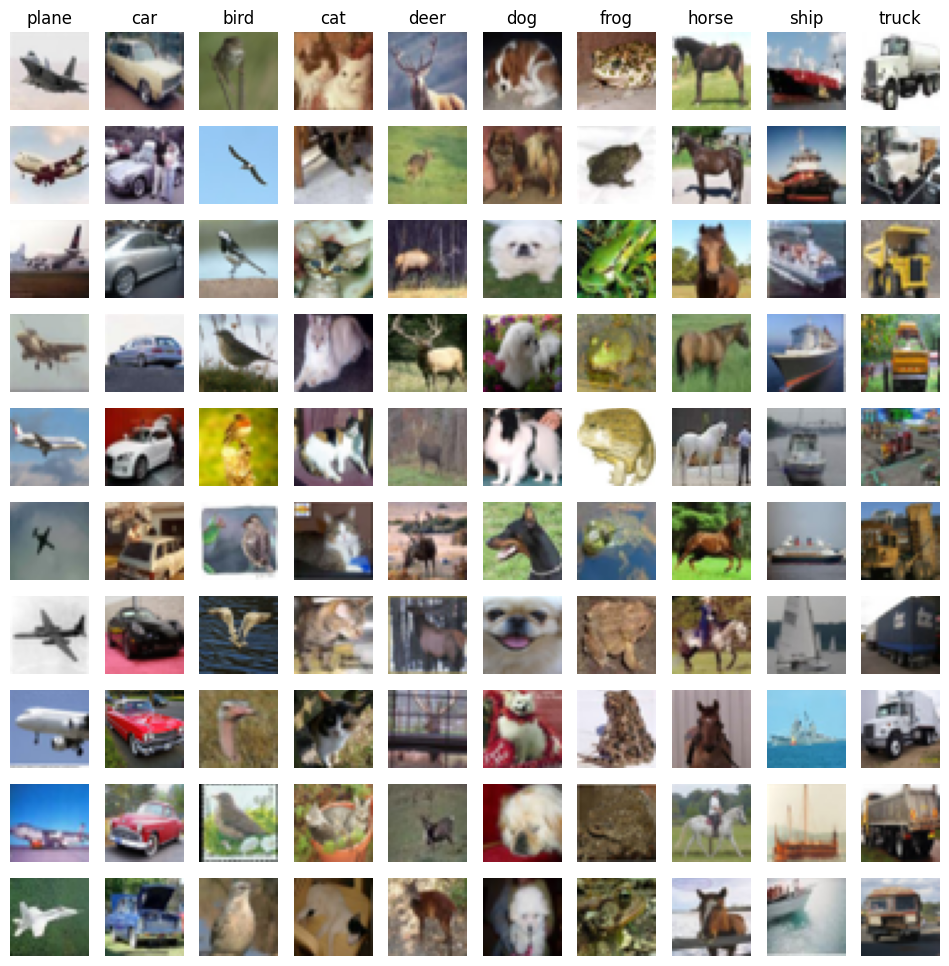

In [ ]:
# Visualize CIFAR-10 dataset 
plt.figure(figsize=(12,12))
num_classes = len(class_names)
samples_per_class = 10
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

###Normalize and Reshaping Dataset

In [3]:
#Reshape training data
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test =np.reshape(X_test, (X_test.shape[0], -1))
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [ ]:
print('Training data shape : ', X_train.shape)
print('Training labels shape : ', y_train.shape)
print('Test data shape : ', X_test.shape)
print('Test labels shape : ', y_test.shape)

Training data shape :  (50000, 3072)
Training labels shape :  (50000, 1)
Test data shape :  (10000, 3072)
Test labels shape :  (10000, 1)


Neural network prefer data to be scaled (normalized) , this means they like to have the numbers in the tensors they try to find patterns between 0 & 1 .

In [4]:
# The action involves carrying out feature scaling, which is intended to ensure that the data of various features are within a similar range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = tf.constant(sc.transform(X_train))
X_test = tf.constant(sc.transform(X_test))

###Sampling our dataset

In [7]:
sample_number = 10000

In [6]:
def equal_distribution_sample_size(X_train = X_train,y_train = y_train,sample_number=5000):
  """
  This function enables the creation of smaller datasets with an equal number of instances for each class, by taking a large dataset as input and specifying the desired sample size. 
  Specifically, the function requires the training dataset (i.e., X_train and y_train) as input and returns a sample of the data (i.e., X_train_sample and y_train_sample) as output.

  """
  y, idx = tf.unique(tf.squeeze(y_train))
  sample_X = []
  sample_y = []
  sample_num = sample_number // len(y)
  for i in y:
    sample_X.extend( X_train[tf.where(y_train==i)[:,0]][:sample_num])
    sample_y.extend(list(tf.fill((sample_num,),i).numpy()))
  return tf.constant(sample_X),tf.constant(sample_y)

In [8]:
X_train_sample,y_train_sample=equal_distribution_sample_size(X_train.numpy(),y_train.numpy(),sample_number)

In [9]:
y_train_sample = tf.reshape(y_train_sample,[sample_number,1])

In [ ]:
print('Training data shape : ', X_train_sample.shape)
print('Training labels shape : ', y_train_sample.shape)
print('Test data shape : ', X_test.shape)
print('Test labels shape : ', y_test.shape)

Training data shape :  (10000, 3072)
Training labels shape :  (10000, 1)
Test data shape :  (10000, 3072)
Test labels shape :  (10000, 1)


In [ ]:
y_train_sample_df = pd.DataFrame(y_train_sample,columns=["Labels"])
y_train_sample_df

,Labels
0,6
1,6
2,6
3,6
4,6
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
distribution_train_sample = y_train_sample_df["Labels"].value_counts()
distribution_train_sample

6    1000
9    1000
4    1000
1    1000
2    1000
7    1000
8    1000
3    1000
5    1000
0    1000
Name: Labels, dtype: int64

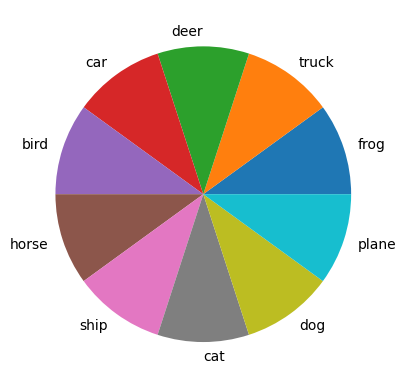

In [ ]:
# visualization of the distribution of the train dataset
plt.pie(distribution_train_sample.values, labels = [class_names[i] for i in distribution_train_sample.index])
plt.show() 

In the **Sample Trainining dataset**, the frequency of classes is uniform across all the different categories. This means that each class has an equal representation in the dataset, and there is no significant bias towards any particular class. The distribution of classes does not show any major imbalance, and each class has an approximately equal number of instances in the dataset. Therefore, the train dataset is considered to have a balanced distribution of classes.

## KNN Implementation (all training data)



####First KNN Model Using All Training Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# I randomly assigned the k value
knn_model = KNeighborsClassifier(n_neighbors=3)

#Fit model using training data
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Predict test data
y_pred = knn_model.predict(X_test)


In [ ]:
y_test[:10]

<tf.Tensor: shape=(10, 1), dtype=uint8, numpy=
array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)>

In [ ]:
y_pred[:10]

array([2, 8, 8, 0, 4, 6, 2, 2, 4, 8], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# The accuracy score can be further enhanced with cross validation

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3308


In [ ]:
X_train.shape,y_train.shape

(TensorShape([50000, 3072]), TensorShape([50000, 1]))

###Cross Validation part

####Second KNN Model Using All Training Dataset

In [ ]:
#train model with cv of 5 and k value is 3
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X_train.numpy(), y_train.numpy(), cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.3245 0.3267 0.3324 0.3249 0.3229]
cv_scores mean:0.32628


In [ ]:
# find optimal k value 
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_to_accuracies = {}
for k in k_choices:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_to_accuracies[k] = accuracy

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

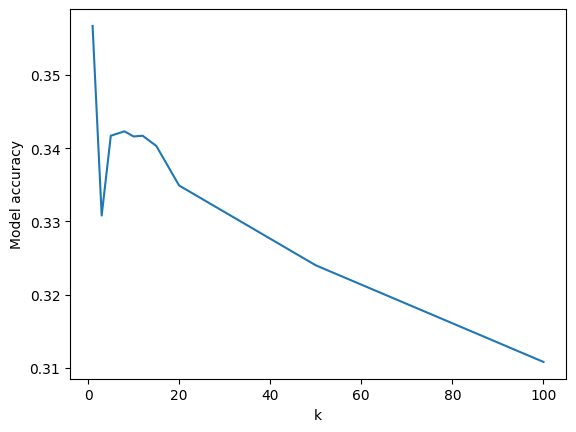

In [ ]:
plt.plot(k_to_accuracies.keys(),k_to_accuracies.values())
plt.xlabel('k')
plt.ylabel('Model accuracy')
plt.show()

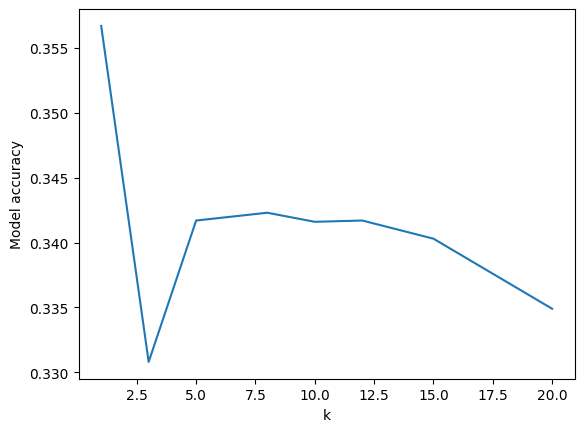

In [ ]:
plt.plot(list(k_to_accuracies.keys())[:-2],list(k_to_accuracies.values())[:-2])
plt.xlabel('k')
plt.ylabel('Model accuracy')
plt.show()

The K-nearest neighbors (KNN) model achieves the highest level of accuracy when K is set to 1.

In [ ]:
# knn for k = 1 which model gives the best accuracy 
knn_model = KNeighborsClassifier(n_neighbors=1)

#Fit model using training data
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Predict test data
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3567


###KNN Implementation Sample Training Dataset (sample size = 10000)

####Third KNN Model Using Sample Training Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [1,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train_sample.numpy(), y_train_sample.numpy())

Fitting 3 folds for each of 42 candidates, totalling 126 fits


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# find the best score
g_res.best_score_

0.3275986866833054

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
# knn for k = 1 which model gives the best accuracy 
knn_model = KNeighborsClassifier(n_neighbors=11,weights = "distance",metric="manhattan")

#Fit model using training data
knn_model.fit(X_train_sample, y_train_sample)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
#Predict test data
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3356


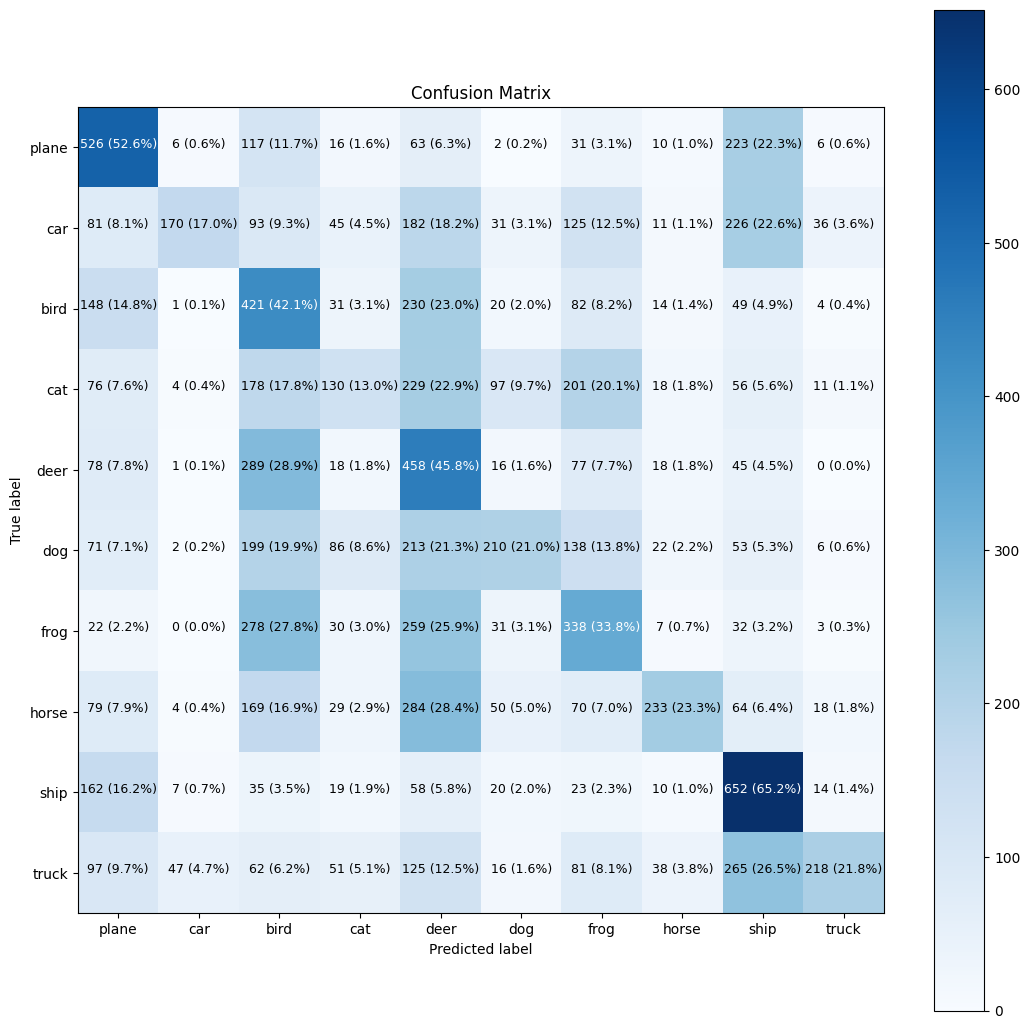

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.53      0.45      1000
           1       0.70      0.17      0.27      1000
           2       0.23      0.42      0.30      1000
           3       0.29      0.13      0.18      1000
           4       0.22      0.46      0.30      1000
           5       0.43      0.21      0.28      1000
           6       0.29      0.34      0.31      1000
           7       0.61      0.23      0.34      1000
           8       0.39      0.65      0.49      1000
           9       0.69      0.22      0.33      1000

    accuracy                           0.34     10000
   macro avg       0.42      0.34      0.32     10000
weighted avg       0.42      0.34      0.32     10000



❗ The reason why the third model gives lower accuracy than the second model is that the all train data set is not used in the third model. The success of the second model with the sample data set is 0.29 .

####Second KNN Model Using Sample Data

In [ ]:
# knn for k = 1 which model gives the best accuracy 
knn_model_1 = KNeighborsClassifier(n_neighbors=1)

#Fit model using training data
knn_model_1.fit(X_train_sample, y_train_sample)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Predict test data
y_pred_1 = knn_model_1.predict(X_test)

In [ ]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Accuracy:", accuracy_1)

Accuracy: 0.2903


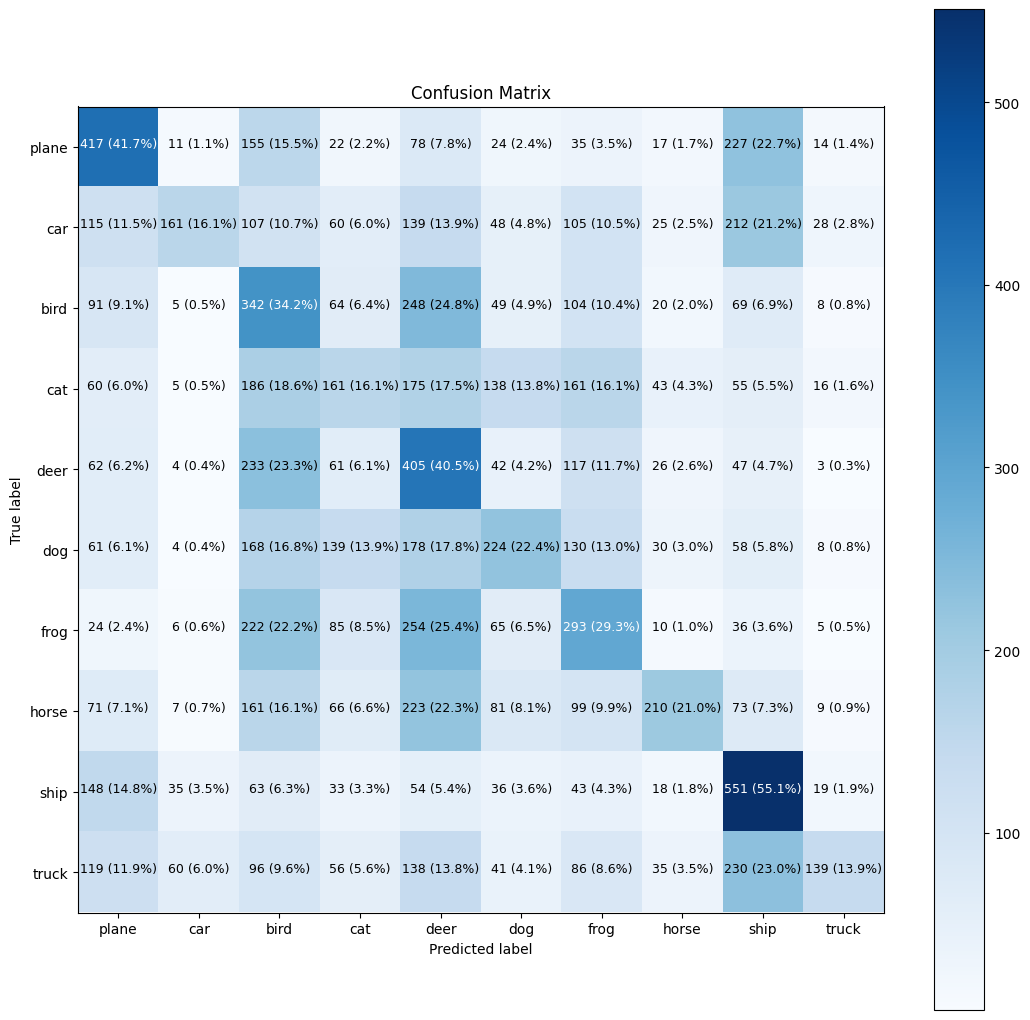

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred_1,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.36      0.42      0.38      1000
           1       0.54      0.16      0.25      1000
           2       0.20      0.34      0.25      1000
           3       0.22      0.16      0.18      1000
           4       0.21      0.41      0.28      1000
           5       0.30      0.22      0.26      1000
           6       0.25      0.29      0.27      1000
           7       0.48      0.21      0.29      1000
           8       0.35      0.55      0.43      1000
           9       0.56      0.14      0.22      1000

    accuracy                           0.29     10000
   macro avg       0.35      0.29      0.28     10000
weighted avg       0.35      0.29      0.28     10000



##SVM Implementation


### Employing PCA and SVM on the all training dataset. (took about 3.5 hours)

In [ ]:
X_train.shape,X_test.shape

(TensorShape([50000, 3072]), TensorShape([10000, 3072]))

In [ ]:
#Due to an excessive amount of data in our training set, I am utilizing PCA.

from sklearn.decomposition import PCA
 
pca = PCA(n_components = 0.75)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
X_train.shape,X_test.shape

((50000, 23), (10000, 23))

In [5]:
# Import libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=1)

In [ ]:
# Make the predictions
y_pred = svc.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" % accuracy_score(y_test, y_pred))

Accuracy score 0.371


###SVM Implementation using sample training dataset. ( sample size = 1000) 

In [10]:
X_train_sample.shape,y_train_sample.shape

(TensorShape([10000, 3072]), TensorShape([10000, 1]))

In [11]:
from sklearn.model_selection import GridSearchCV

In [ ]:
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4,1e5])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
clf.fit(X_train_sample.numpy(), y_train_sample.numpy())
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train_sample.numpy(), y_train_sample.numpy())
grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}

SVM Implementation All Dataset Using Grid_Search HyperParameter

In [7]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=0.001, random_state=1, kernel='linear',gamma=0.1)
 
# Fit the model
svc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.001, gamma=0.1, kernel='linear', random_state=1)

In [8]:
# Make the predictions
y_pred = svc.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" % accuracy_score(y_test, y_pred))

Accuracy score 0.425


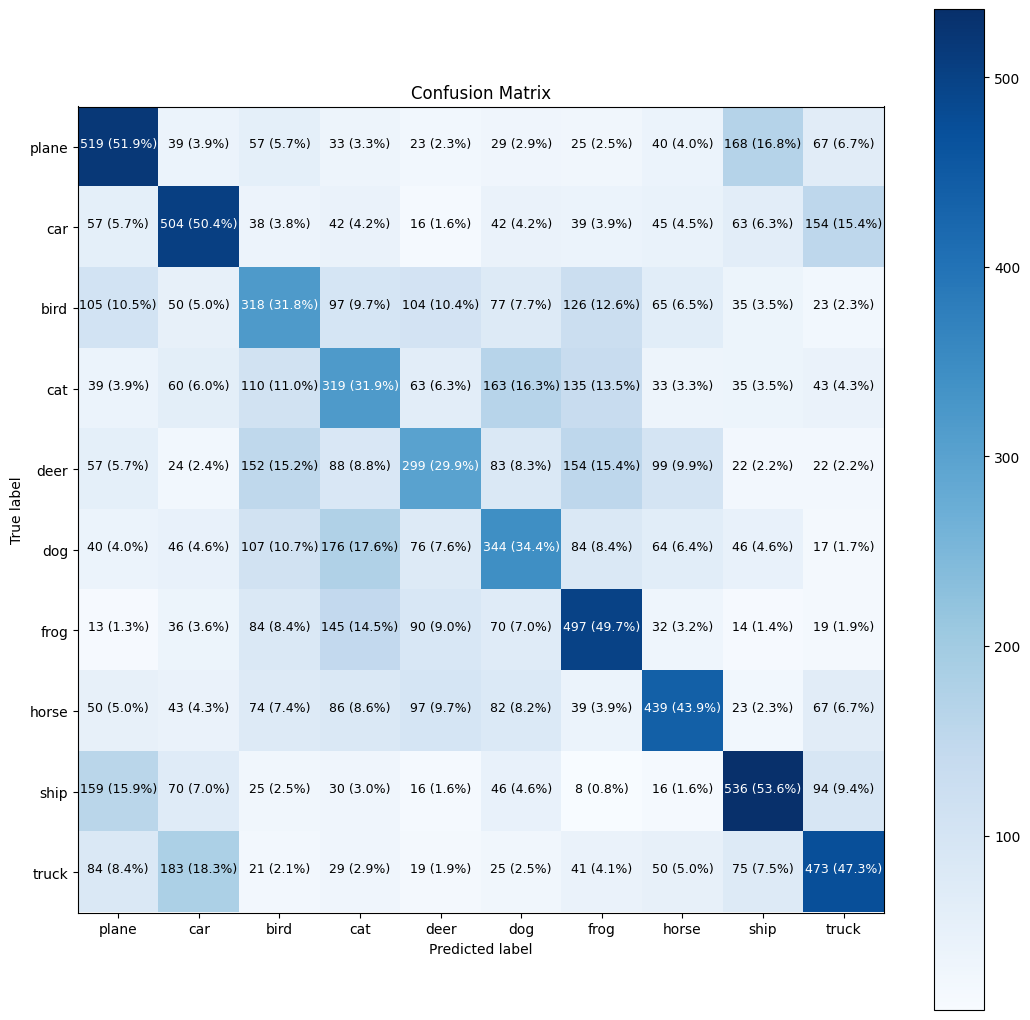

In [11]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49      1000
           1       0.48      0.50      0.49      1000
           2       0.32      0.32      0.32      1000
           3       0.31      0.32      0.31      1000
           4       0.37      0.30      0.33      1000
           5       0.36      0.34      0.35      1000
           6       0.43      0.50      0.46      1000
           7       0.50      0.44      0.47      1000
           8       0.53      0.54      0.53      1000
           9       0.48      0.47      0.48      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.42     10000
weighted avg       0.42      0.42      0.42     10000



##Neural Network

In [ ]:
X_train.shape

TensorShape([50000, 3072])

In [6]:
# I took this function "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" for create prettified confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

###Ground Truth Neural Network Model (model_1)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model_1.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.7906 - accuracy: 0.3653 - val_loss: 1.6378 - val_accuracy: 0.4172
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5967 - accuracy: 0.4349 - val_loss: 1.5720 - val_accuracy: 0.4430
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5202 - accuracy: 0.4617 - val_loss: 1.5302 - val_accuracy: 0.4560
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4552 - accuracy: 0.4833 - val_loss: 1.4987 - val_accuracy: 0.4682
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4056 - accuracy: 0.5020 - val_loss: 1.4851 - val_accuracy: 0.4775
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3649 - accuracy: 0.5149 - val_loss: 1.4807 - val_accuracy: 0.4795
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3337 - accuracy: 0.5253 - val_loss: 1.4538 - val_accuracy:

In [ ]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4951 - accuracy: 0.4937


[1.4950532913208008, 0.4936999976634979]

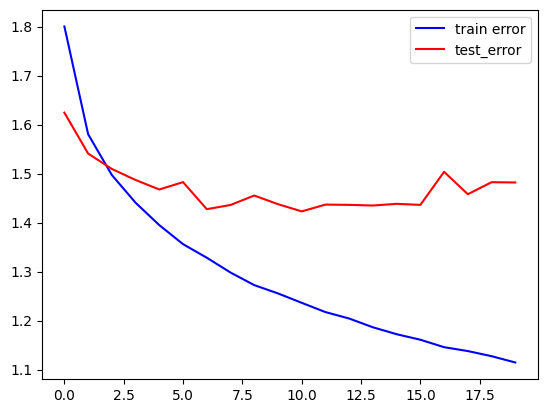

In [ ]:
plt.plot(history.history["loss"],color="b")
plt.plot(history.history["val_loss"],color="r")
plt.legend(["train error", "test_error"])
plt.show()

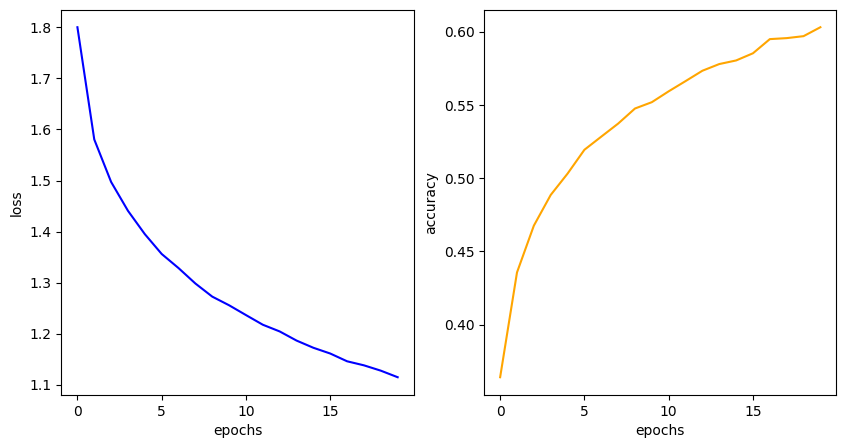

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history.history["loss"], color = "b" )
plt.subplot(1, 2, 2)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.plot(history.history["accuracy"], color = "orange" )
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                153650    
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 156,010
Trainable params: 156,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_probs = model_1.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_preds = y_probs.argmax(axis=1)

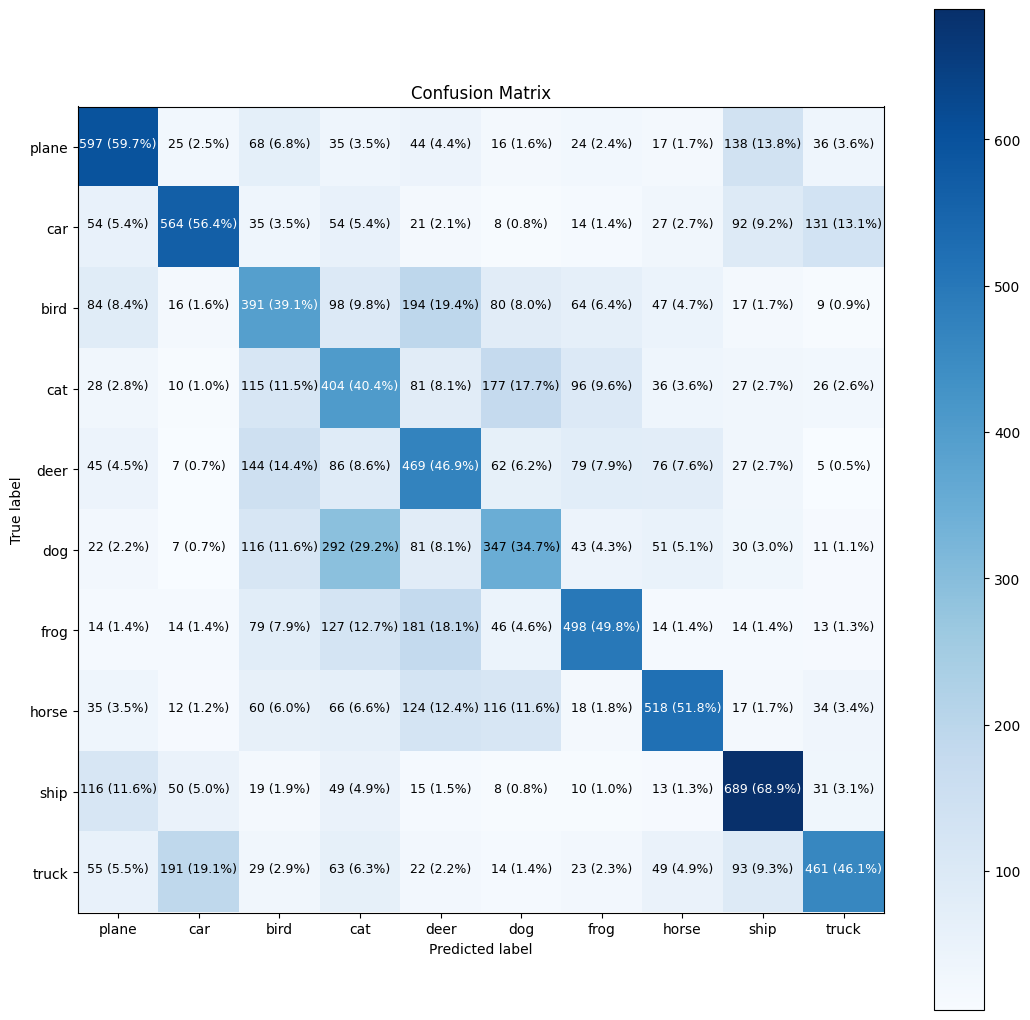

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1000
           1       0.63      0.56      0.59      1000
           2       0.37      0.39      0.38      1000
           3       0.32      0.40      0.36      1000
           4       0.38      0.47      0.42      1000
           5       0.40      0.35      0.37      1000
           6       0.57      0.50      0.53      1000
           7       0.61      0.52      0.56      1000
           8       0.60      0.69      0.64      1000
           9       0.61      0.46      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.50     10000
weighted avg       0.51      0.49      0.50     10000



I aim to improve the model's performance by implementing modifications to it.

###Ideal Learning Rate ( Ground Truth Learning Rate 0.001 (default value) for Adam optimizer) (model_2)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

# Fit the model
history_1 = model_1.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),callbacks=[lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7970 - accuracy: 0.3658 - val_loss: 1.6363 - val_accuracy: 0.4223 - lr: 0.0010
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6108 - accuracy: 0.4326 - val_loss: 1.5657 - val_accuracy: 0.4465 - lr: 0.0013
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5372 - accuracy: 0.4571 - val_loss: 1.5399 - val_accuracy: 0.4469 - lr: 0.0016
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4964 - accuracy: 0.4737 - val_loss: 1.5326 - val_accuracy: 0.4571 - lr: 0.0020
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4775 - accuracy: 0.4773 - val_loss: 1.5112 - val_accuracy: 0.4686 - lr: 0.0025
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4807 - accuracy: 0.4790 - val_loss: 1.5492 - val_accuracy: 0.4433 - lr: 0.0032
Epoch 7/20
1563/1563 [==============================] - 6s

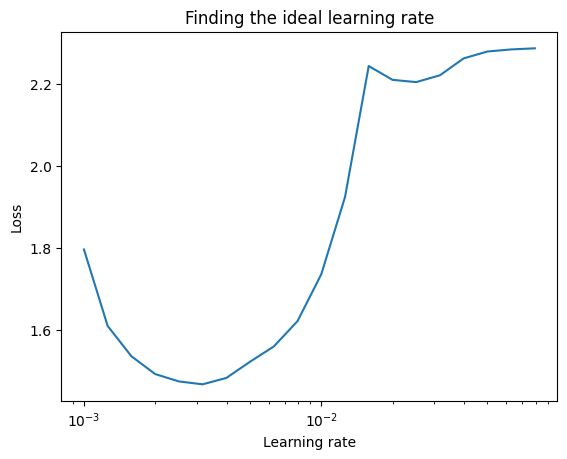

In [ ]:
lrs = 1e-3 * (10**(np.arange(20)/10))
plt.semilogx(lrs, history_1.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.032) is the ideal learning rate.
Create model set to learning rate 0.032

In [ ]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(lr = 0.032),
                 metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8071 - accuracy: 0.3617 - val_loss: 1.6300 - val_accuracy: 0.4200
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5856 - accuracy: 0.4370 - val_loss: 1.5520 - val_accuracy: 0.4512
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4988 - accuracy: 0.4660 - val_loss: 1.5354 - val_accuracy: 0.4540
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4453 - accuracy: 0.4885 - val_loss: 1.4846 - val_accuracy: 0.4717
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3970 - accuracy: 0.5033 - val_loss: 1.4645 - val_accuracy: 0.4857
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3621 - accuracy: 0.5177 - val_loss: 1.4801 - val_accuracy: 0.4759
Epoch 7/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3342 - accuracy: 0.5264 - val_loss: 1.4582 - val_accurac

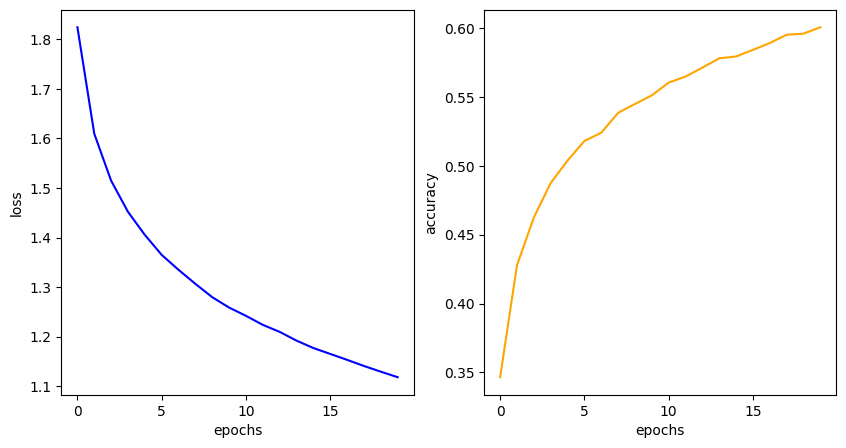

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history_2.history["loss"], color = "b" )
plt.subplot(1, 2, 2)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.plot(history_2.history["accuracy"], color = "orange" )
plt.show()

In [ ]:
y_probs_2 = model_2.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_preds_2 = y_probs_2.argmax(axis=1)

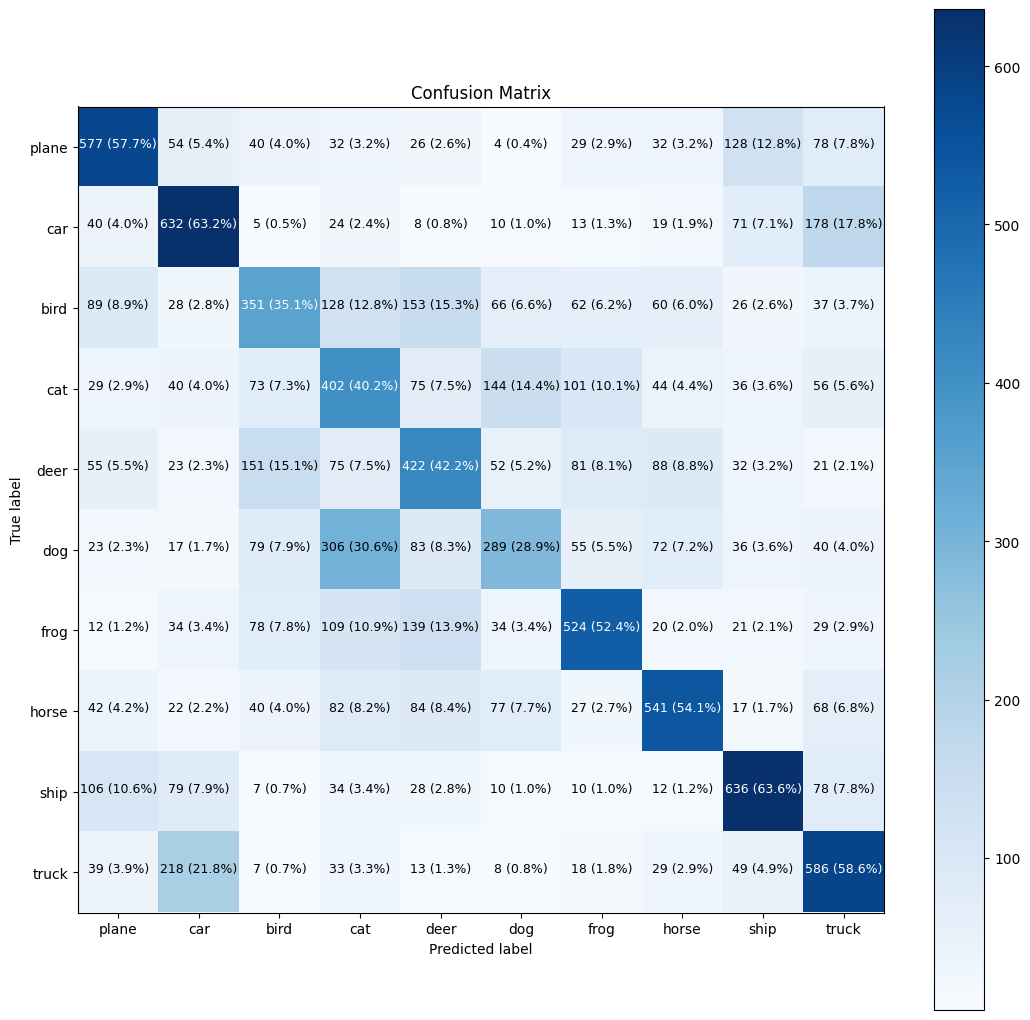

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds_2,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_preds_2))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1000
           1       0.55      0.63      0.59      1000
           2       0.42      0.35      0.38      1000
           3       0.33      0.40      0.36      1000
           4       0.41      0.42      0.42      1000
           5       0.42      0.29      0.34      1000
           6       0.57      0.52      0.55      1000
           7       0.59      0.54      0.56      1000
           8       0.60      0.64      0.62      1000
           9       0.50      0.59      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



I increased the success of the model with the ideal learning rate.

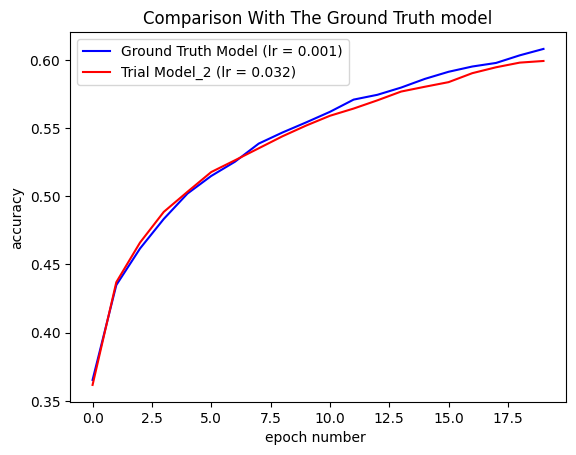

In [ ]:
plt.plot(history.history["accuracy"],color = "b" )
plt.plot(history_2.history["accuracy"],color = "r" )
plt.legend(["Ground Truth Model (lr = 0.001)","Trial Model_2 (lr = 0.032)"])
plt.title("Comparison With The Ground Truth model")
plt.xlabel("epoch number ")
plt.ylabel("accuracy")
plt.show();

###Increase the Epoch Number (model_3)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8385 - accuracy: 0.3480 - val_loss: 1.6791 - val_accuracy: 0.4068
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6043 - accuracy: 0.4315 - val_loss: 1.5707 - val_accuracy: 0.4411
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5098 - accuracy: 0.4650 - val_loss: 1.4979 - val_accuracy: 0.4680
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4499 - accuracy: 0.4877 - val_loss: 1.4947 - val_accuracy: 0.4717
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4048 - accuracy: 0.5018 - val_loss: 1.4900 - val_accuracy: 0.4780
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3676 - accuracy: 0.5140 - val_loss: 1.4716 - val_accuracy: 0.4749
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3380 - accuracy: 0.5225 - val_loss: 1.4458 - val_accuracy

In [ ]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.7518 - accuracy: 0.4780


[1.7518454790115356, 0.4779999852180481]

In [ ]:
history_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

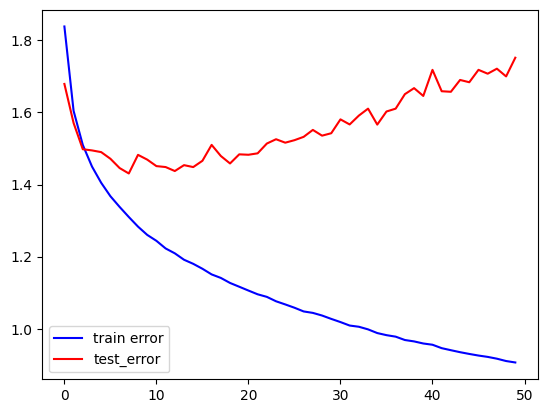

In [ ]:
plt.plot(history_3.history["loss"],color="b")
plt.plot(history_3.history["val_loss"],color="r")
plt.legend(["train error", "test_error"])
plt.show()

❗❗❗ The number of epochs increases, the training error decreases. However, once the test error starts increasing beyond a certain point, it suggests that the model is **overfitting**. This means that instead of learning from the training data, the model is just memorizing it. This overfitting is usually caused by too many epochs.

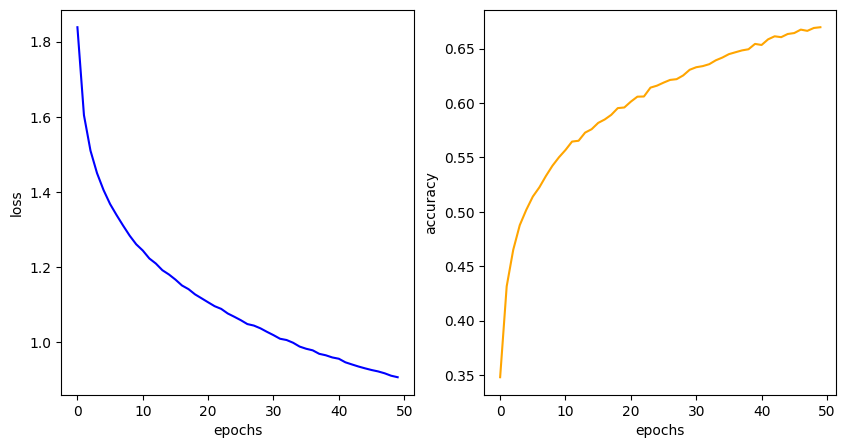

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history_3.history["loss"], color = "b" )
plt.subplot(1, 2, 2)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.plot(history_3.history["accuracy"], color = "orange" )
plt.show()

In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                153650    
                                                                 
 dense_23 (Dense)            (None, 30)                1530      
                                                                 
 dense_24 (Dense)            (None, 20)                620       
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
Total params: 156,010
Trainable params: 156,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_probs_3 = model_3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_preds_3 = y_probs_3.argmax(axis=1)

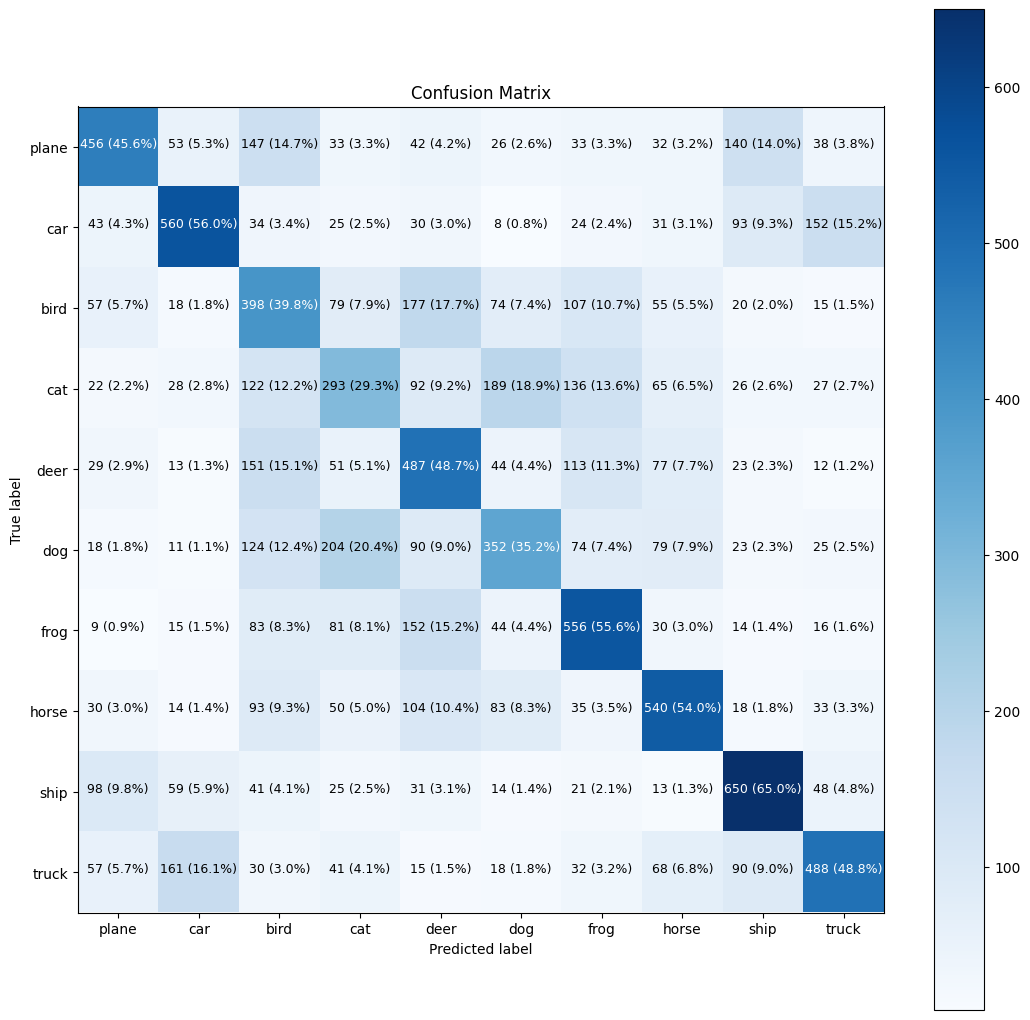

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds_3,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_preds_3))

              precision    recall  f1-score   support

           0       0.56      0.46      0.50      1000
           1       0.60      0.56      0.58      1000
           2       0.33      0.40      0.36      1000
           3       0.33      0.29      0.31      1000
           4       0.40      0.49      0.44      1000
           5       0.41      0.35      0.38      1000
           6       0.49      0.56      0.52      1000
           7       0.55      0.54      0.54      1000
           8       0.59      0.65      0.62      1000
           9       0.57      0.49      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



###Change Optimizer (model_4)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8105 - accuracy: 0.3512 - val_loss: 1.6410 - val_accuracy: 0.4247
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6016 - accuracy: 0.4314 - val_loss: 1.5705 - val_accuracy: 0.4392
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5164 - accuracy: 0.4640 - val_loss: 1.5265 - val_accuracy: 0.4630
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4604 - accuracy: 0.4800 - val_loss: 1.4985 - val_accuracy: 0.4695
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4164 - accuracy: 0.4978 - val_loss: 1.4714 - val_accuracy: 0.4822
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3810 - accuracy: 0.5081 - val_loss: 1.4681 - val_accuracy: 0.4806
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3494 - accuracy: 0.5185 - val_loss: 1.4544 - val_accur

In [ ]:
model_4.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5128 - accuracy: 0.4790


[1.5128415822982788, 0.4790000021457672]

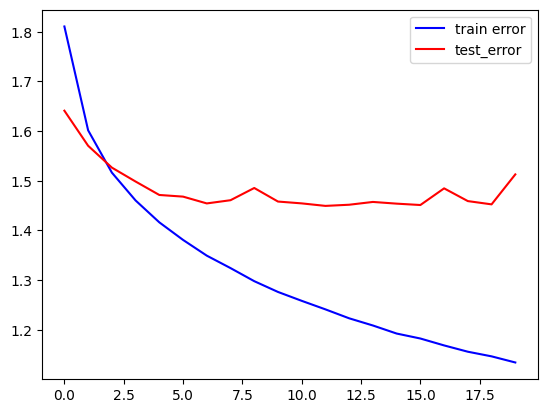

In [ ]:
plt.plot(history_4.history["loss"],color="b")
plt.plot(history_4.history["val_loss"],color="r")
plt.legend(["train error", "test_error"])
plt.show()

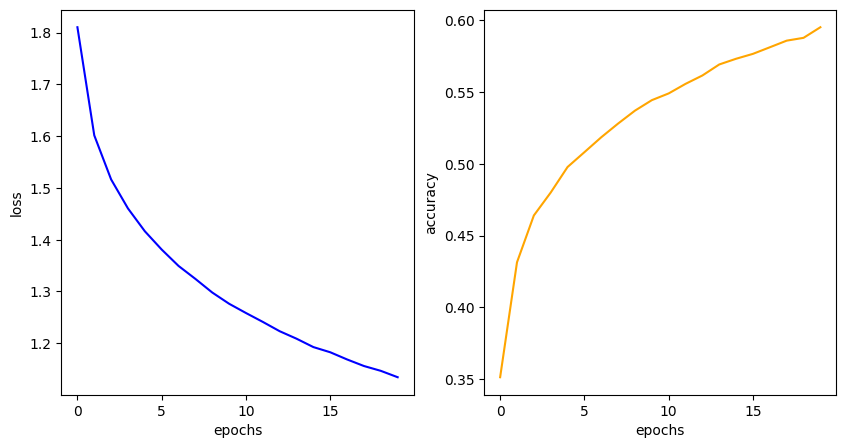

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history_4.history["loss"], color = "b" )
plt.subplot(1, 2, 2)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.plot(history_4.history["accuracy"], color = "orange" )
plt.show()

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                153650    
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
Total params: 156,010
Trainable params: 156,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_probs_4 = model_4.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_preds_4 = y_probs_4.argmax(axis=1)

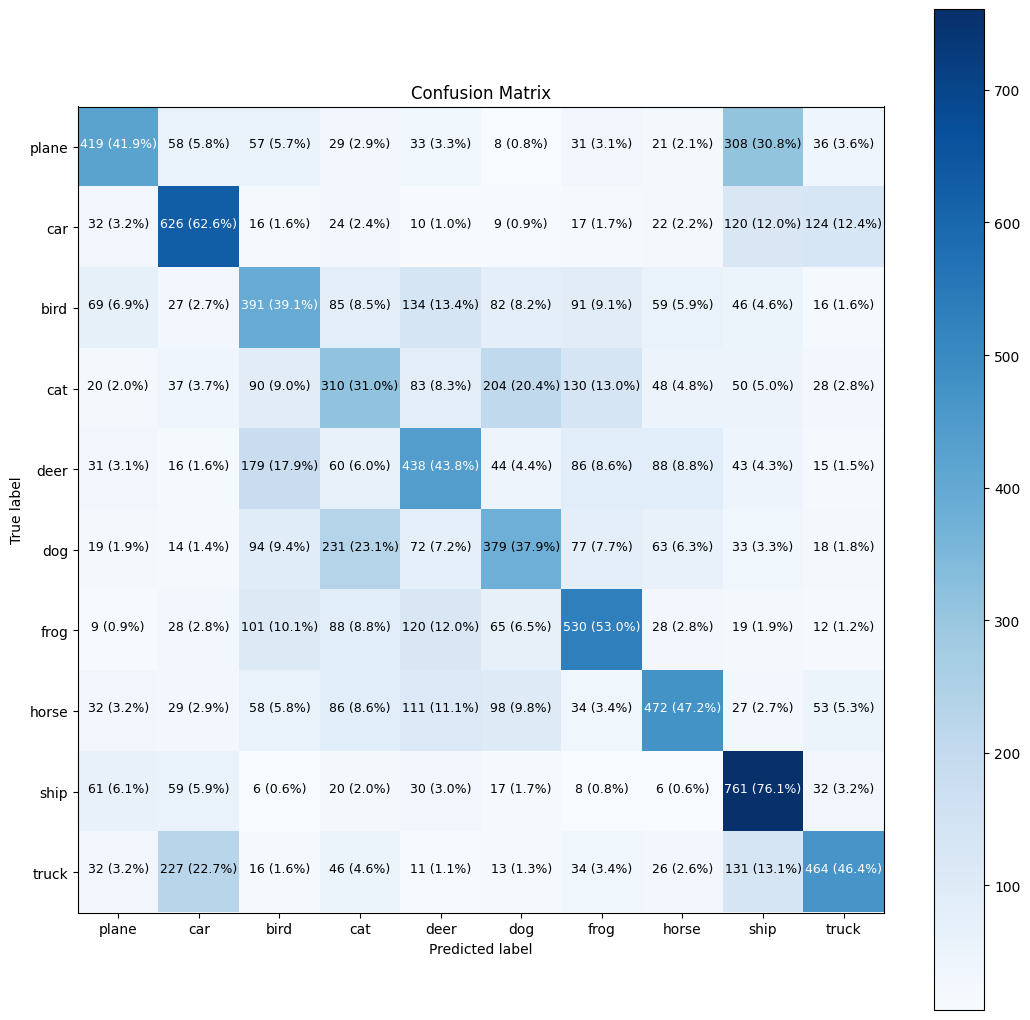

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds_4,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_preds_4))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49      1000
           1       0.56      0.63      0.59      1000
           2       0.39      0.39      0.39      1000
           3       0.32      0.31      0.31      1000
           4       0.42      0.44      0.43      1000
           5       0.41      0.38      0.39      1000
           6       0.51      0.53      0.52      1000
           7       0.57      0.47      0.52      1000
           8       0.49      0.76      0.60      1000
           9       0.58      0.46      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



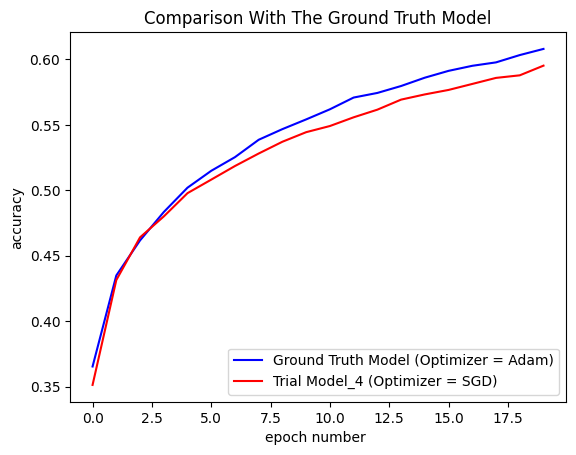

In [ ]:
plt.plot(history.history["accuracy"],color = "b" )
plt.plot(history_4.history["accuracy"],color = "r" )
plt.legend(["Ground Truth Model (Optimizer = Adam)","Trial Model_4 (Optimizer = SGD)"])
plt.title("Comparison With The Ground Truth Model")
plt.xlabel("epoch number ")
plt.ylabel("accuracy")
plt.show();

###Change Activation Function (model_5)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "sigmoid"),
  tf.keras.layers.Dense(30, activation="sigmoid"),
  tf.keras.layers.Dense(20, activation="sigmoid"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9882 - accuracy: 0.2797 - val_loss: 1.8665 - val_accuracy: 0.3365
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8221 - accuracy: 0.3496 - val_loss: 1.7923 - val_accuracy: 0.3527
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7657 - accuracy: 0.3670 - val_loss: 1.7637 - val_accuracy: 0.3673
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7278 - accuracy: 0.3825 - val_loss: 1.7332 - val_accuracy: 0.3819
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6928 - accuracy: 0.3931 - val_loss: 1.7070 - val_accuracy: 0.3914
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6605 - accuracy: 0.4073 - val_loss: 1.6840 - val_accuracy: 0.4016
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6399 - accuracy: 0.4143 - val_loss: 1.6602 - val_accuracy:

In [ ]:
model_5.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5775 - accuracy: 0.4426


[1.5775266885757446, 0.4426000118255615]

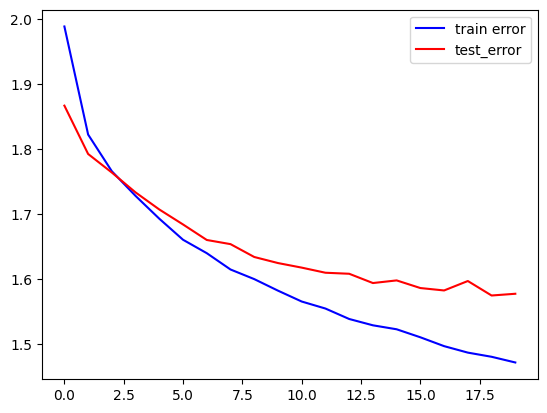

In [ ]:
plt.plot(history_5.history["loss"],color="b")
plt.plot(history_5.history["val_loss"],color="r")
plt.legend(["train error", "test_error"])
plt.show()

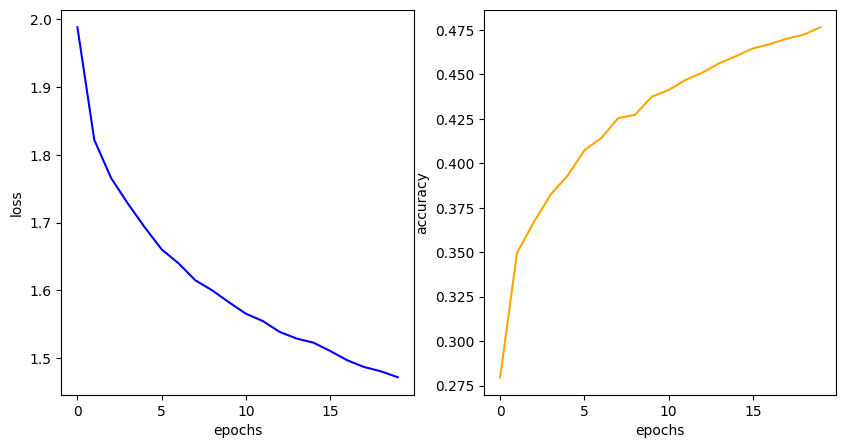

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history_5.history["loss"], color = "b" )
plt.subplot(1, 2, 2)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.plot(history_5.history["accuracy"], color = "orange" )
plt.show()

In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                153650    
                                                                 
 dense_21 (Dense)            (None, 30)                1530      
                                                                 
 dense_22 (Dense)            (None, 20)                620       
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
Total params: 156,010
Trainable params: 156,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_probs_5 = model_5.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_preds_5 = y_probs_5.argmax(axis=1)

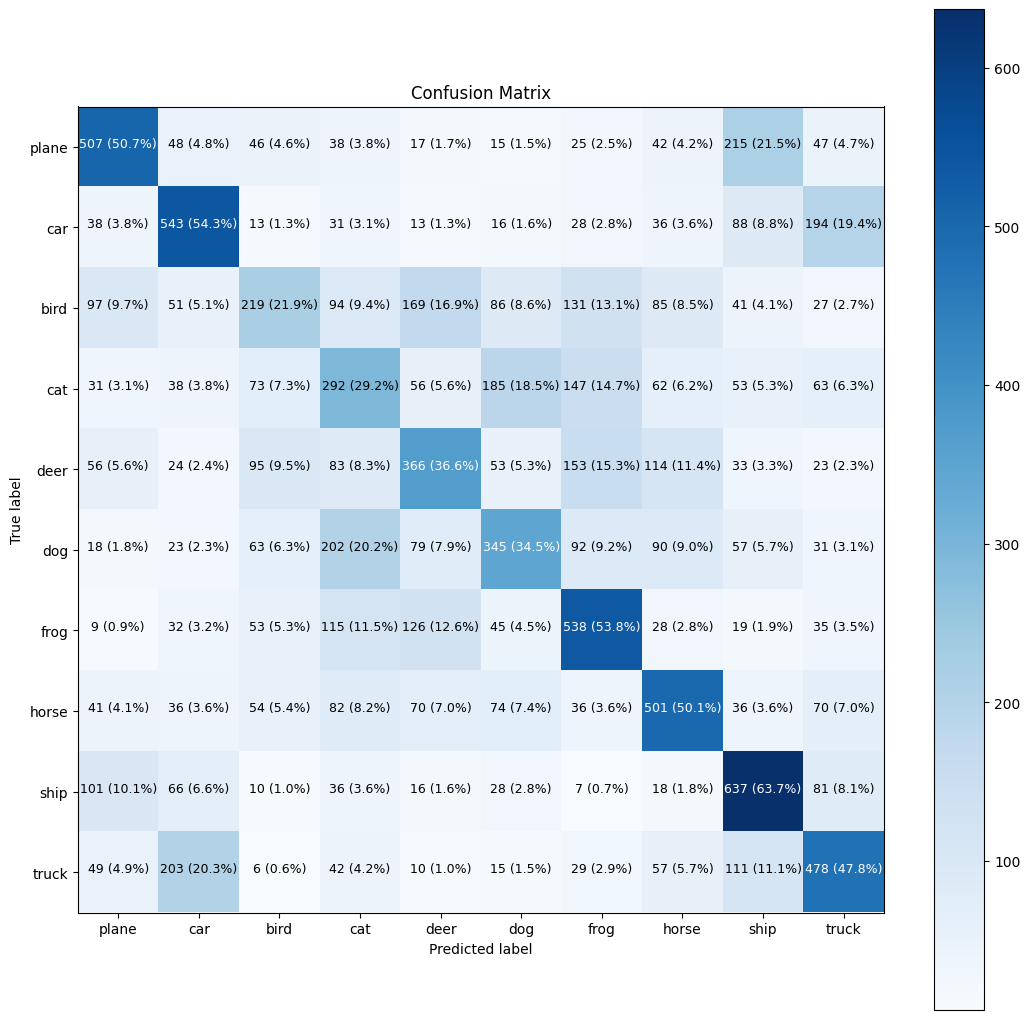

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds_5,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_preds_5))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52      1000
           1       0.51      0.54      0.53      1000
           2       0.35      0.22      0.27      1000
           3       0.29      0.29      0.29      1000
           4       0.40      0.37      0.38      1000
           5       0.40      0.34      0.37      1000
           6       0.45      0.54      0.49      1000
           7       0.48      0.50      0.49      1000
           8       0.49      0.64      0.56      1000
           9       0.46      0.48      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.44      0.44      0.44     10000
weighted avg       0.44      0.44      0.44     10000



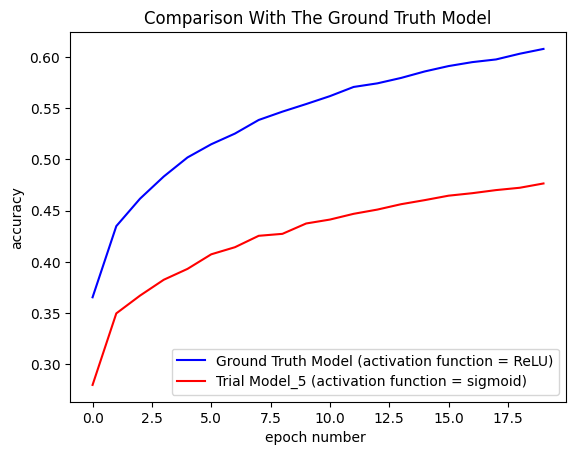

In [ ]:
plt.plot(history.history["accuracy"],color = "b" )
plt.plot(history_5.history["accuracy"],color = "r" )
plt.legend(["Ground Truth Model (activation function = ReLU)","Trial Model_5 (activation function = sigmoid)"])
plt.title("Comparison With The Ground Truth Model")
plt.xlabel("epoch number ")
plt.ylabel("accuracy")
plt.show();

###Change Model Structure (model_6)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = "relu"),
  tf.keras.layers.Dense(40, activation = "relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8063 - accuracy: 0.3575 - val_loss: 1.6428 - val_accuracy: 0.4242
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5992 - accuracy: 0.4325 - val_loss: 1.5748 - val_accuracy: 0.4416
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5116 - accuracy: 0.4655 - val_loss: 1.5210 - val_accuracy: 0.4629
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4507 - accuracy: 0.4879 - val_loss: 1.4955 - val_accuracy: 0.4692
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4029 - accuracy: 0.5035 - val_loss: 1.4650 - val_accuracy: 0.4828
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3640 - accuracy: 0.5171 - val_loss: 1.4947 - val_accuracy: 0.4800
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3355 - accuracy: 0.5262 - val_loss: 1.4437 - val_accura

In [ ]:
model_6.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5010 - accuracy: 0.4947


[1.5009878873825073, 0.49470001459121704]

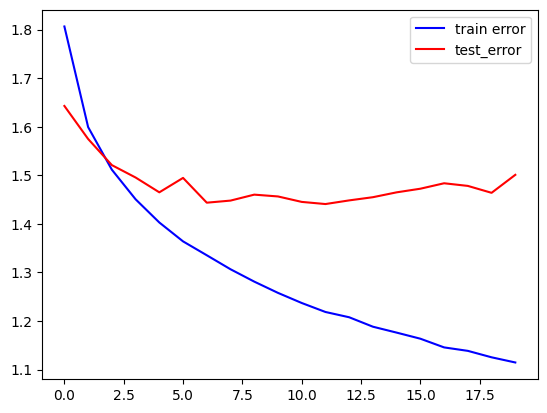

In [ ]:
plt.plot(history_6.history["loss"],color="b")
plt.plot(history_6.history["val_loss"],color="r")
plt.legend(["train error", "test_error"])
plt.show()

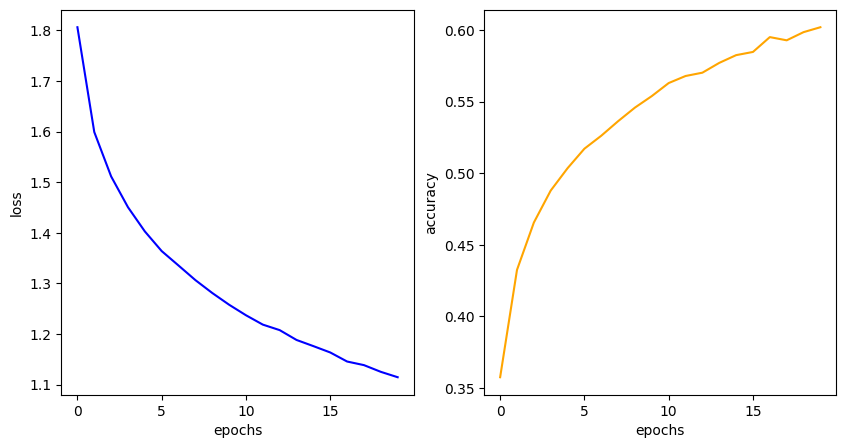

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history_6.history["loss"], color = "b" )
plt.subplot(1, 2, 2)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.plot(history_6.history["accuracy"], color = "orange" )
plt.show()

In [ ]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                153650    
                                                                 
 dense_25 (Dense)            (None, 40)                2040      
                                                                 
 dense_26 (Dense)            (None, 30)                1230      
                                                                 
 dense_27 (Dense)            (None, 20)                620       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
Total params: 157,750
Trainable params: 157,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_probs_6 = model_6.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_preds_6 = y_probs_6.argmax(axis=1)

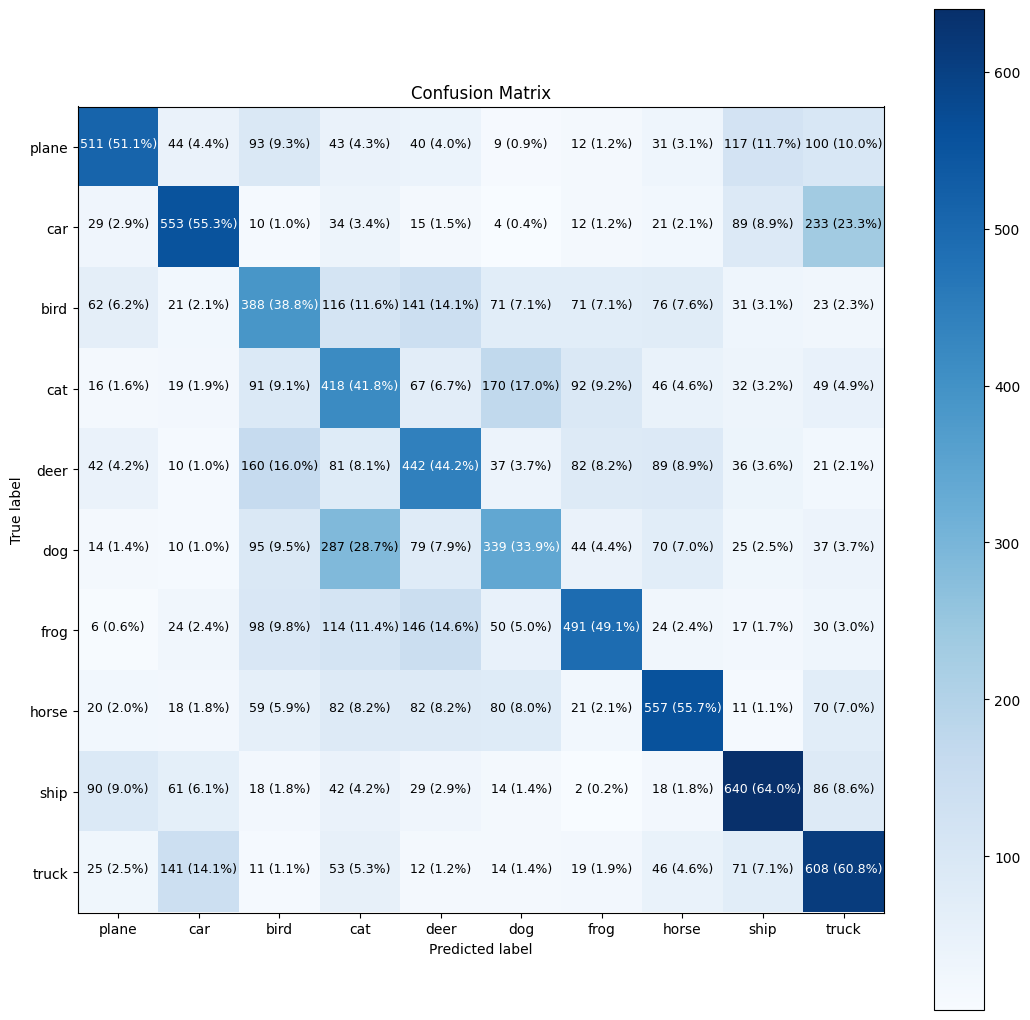

In [ ]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds_6,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test, y_preds_6))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1000
           1       0.61      0.55      0.58      1000
           2       0.38      0.39      0.38      1000
           3       0.33      0.42      0.37      1000
           4       0.42      0.44      0.43      1000
           5       0.43      0.34      0.38      1000
           6       0.58      0.49      0.53      1000
           7       0.57      0.56      0.56      1000
           8       0.60      0.64      0.62      1000
           9       0.48      0.61      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.50     10000
weighted avg       0.50      0.49      0.50     10000



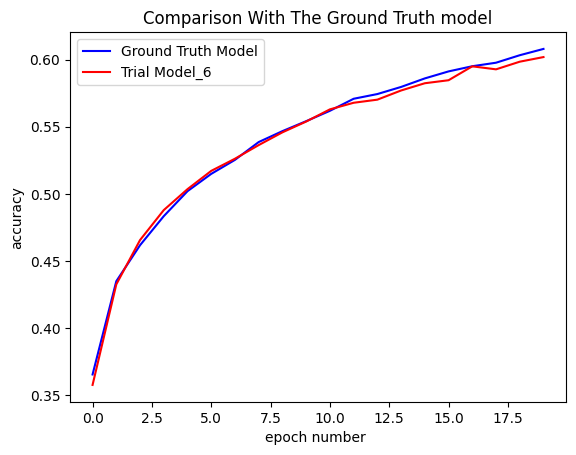

In [ ]:
plt.plot(history.history["accuracy"],color = "b" )
plt.plot(history_6.history["accuracy"],color = "r" )
plt.legend(["Ground Truth Model","Trial Model_6"])
plt.title("Comparison With The Ground Truth model")
plt.xlabel("epoch number ")
plt.ylabel("accuracy")
plt.show();